In [1]:
"""
import pandas as pd
import glob
import os
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import *
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.functions import vector_to_array
from pyspark.sql.functions import regexp_replace, col
"""

'\nimport pandas as pd\nimport glob\nimport os\nfrom pyspark.sql import SparkSession\nfrom pyspark.ml.feature import StringIndexer\nfrom pyspark.sql.types import *\nfrom pyspark.ml.feature import OneHotEncoder\nfrom pyspark.ml.functions import vector_to_array\nfrom pyspark.sql.functions import regexp_replace, col\n'

# Imports & Configuration

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import gc

In [3]:
spark = SparkSession \
    .builder \
    .appName("Data_Import") \
    .config("spark.memory.offHeap.enabled","true") \
    .config("spark.driver.cores","4") \
    .config("spark.driver.maxResultSize","4g") \
    .config("spark.memory.offHeap.size","4g") \
    .config("spark.driver.memory", "4g")\
    .config("spark.executor.memory","4g")\
    .getOrCreate()

23/04/12 15:16:41 WARN Utils: Your hostname, nuno-g14 resolves to a loopback address: 127.0.1.1; using 10.125.139.66 instead (on interface wlp2s0)
23/04/12 15:16:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/12 15:16:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Data Reading

In [4]:
frame = spark.read.parquet("../MSc_Model_Datasets/Data_SEF_Clean.parquet")

# Data Exploration

In [5]:
frame.printSchema()

root
 |-- rsn: long (nullable = true)
 |-- Unidade_Hoteleira: double (nullable = true)
 |-- CAE: double (nullable = true)
 |-- Tipologia: string (nullable = true)
 |-- Classificacao: double (nullable = true)
 |-- Data_Checkin: long (nullable = true)
 |-- Data_Checkout: long (nullable = true)
 |-- Idade: double (nullable = true)
 |-- Concelho_UH: string (nullable = true)
 |-- Nacionalidade: string (nullable = true)
 |-- Pais_Origem: string (nullable = true)
 |-- Number_of_Nights: integer (nullable = true)



In [6]:
frame.limit(5).show()

+--------+-----------------+-------+--------------------+-------------+------------+-------------+-----+-----------+-------------+-----------+----------------+
|     rsn|Unidade_Hoteleira|    CAE|           Tipologia|Classificacao|Data_Checkin|Data_Checkout|Idade|Concelho_UH|Nacionalidade|Pais_Origem|Number_of_Nights|
+--------+-----------------+-------+--------------------+-------------+------------+-------------+-----+-----------+-------------+-----------+----------------+
|30409465|           3300.0|55204.0|Alojamento Local/...|         null|  1388534400|   1388707200| 35.0|      Porto|      ESPANHA|    ESPANHA|               2|
|30409474|            959.0|55122.0|Alojamento Local/...|         null|  1388534400|   1388707200| 51.0|     Lisboa|    ARGENTINA|  ARGENTINA|               2|
|30409614|           1066.0|55121.0|               Hotel|          3.0|  1388534400|   1388620800| 46.0|    Valença|      BÉLGICA|    BÉLGICA|               1|
|30409823|           1356.0|55204.0|Pous

In [7]:
# frame.select("rsn", "Unidade_Hoteleira", "CAE", "Tipologia").describe().show()

In [8]:
# frame.select("Classificacao", "Data_Checkin", "Data_Checkout", "Idade").describe().show()

In [9]:
# frame.select("Concelho_UH", "Nacionalidade", "Pais_Origem").describe().show()

In [10]:
gc.collect()

dist_cols = ['Tipologia', 'Concelho_UH', 'Nacionalidade', 'Pais_Origem']

for col in dist_cols:
    lst = frame.select(col).distinct().collect()
    print(col + ':')
    for item in lst:
        print(item)
    print()

Tipologia:
Row(Tipologia='Motel')
Row(Tipologia='Hotéis rurais')
Row(Tipologia='Hotel apartamento')
Row(Tipologia='Colónia de férias')
Row(Tipologia='Pensão')
Row(Tipologia='Pousada da juventude')
Row(Tipologia='Residência Universitária')
Row(Tipologia='Hotel')
Row(Tipologia='Agroturismo')
Row(Tipologia='Alojamento Local/Apartamento')
Row(Tipologia='Estalagem')
Row(Tipologia='Turismo de habitação')
Row(Tipologia='Apartamento turístico')
Row(Tipologia='Alojamento Local/Estabelecimento de hospedagem')
Row(Tipologia='Aldeamento turístico')
Row(Tipologia='Turismo rural')
Row(Tipologia='Turismo de natureza')
Row(Tipologia='Pousada')
Row(Tipologia='Parque de campismo')
Row(Tipologia='Casa de campo')
Row(Tipologia='Alojamento Local/Moradias')
Row(Tipologia='Turismo de aldeia')



Concelho_UH:
Row(Concelho_UH='Caminha')
Row(Concelho_UH='Batalha')
Row(Concelho_UH='Benavente')
Row(Concelho_UH='Pombal')
Row(Concelho_UH='Trancoso')
Row(Concelho_UH='Cartaxo')
Row(Concelho_UH='Tavira')
Row(Concelho_UH='Rio Maior')
Row(Concelho_UH='Albufeira')
Row(Concelho_UH='Sernancelhe')
Row(Concelho_UH='Estarreja')
Row(Concelho_UH='Almeida')
Row(Concelho_UH='Santa Comba Dão')
Row(Concelho_UH='Arruda dos Vinhos')
Row(Concelho_UH='Fafe')
Row(Concelho_UH='Odivelas')
Row(Concelho_UH='São Pedro do Sul')
Row(Concelho_UH='Freixo Espada à Cinta')
Row(Concelho_UH='Constância')
Row(Concelho_UH='Sousel')
Row(Concelho_UH='Monção')
Row(Concelho_UH='Aljezur')
Row(Concelho_UH='Alcácer do Sal')
Row(Concelho_UH='Loulé')
Row(Concelho_UH='Braga')
Row(Concelho_UH='Vendas Novas')
Row(Concelho_UH='Alter do Chão')
Row(Concelho_UH='Albergaria-a-Velha')
Row(Concelho_UH='Portel')
Row(Concelho_UH='Barreiro')
Row(Concelho_UH='Sabrosa')
Row(Concelho_UH='Aveiro')
Row(Concelho_UH='Pampilhosa da Serra')
Row(Conce

Nacionalidade:
Row(Nacionalidade='BAHAMAS')
Row(Nacionalidade='EMIRATOS ÁRABES UNIDOS')
Row(Nacionalidade='CABO VERDE')
Row(Nacionalidade='COREIA DO NORTE')
Row(Nacionalidade='LETÓNIA')
Row(Nacionalidade='LÍBANO')
Row(Nacionalidade='BANGLADESH')
Row(Nacionalidade='TIMOR-LESTE')
Row(Nacionalidade='UGANDA')
Row(Nacionalidade='ANTÍGUA E BARBUDA')
Row(Nacionalidade='MOÇAMBIQUE')
Row(Nacionalidade='GRÉCIA')
Row(Nacionalidade='ESTÓNIA')
Row(Nacionalidade='ARMÉNIA')
Row(Nacionalidade='CAMBOJA')
Row(Nacionalidade='NOVA ZELÂNDIA')
Row(Nacionalidade='BÉLGICA')
Row(Nacionalidade='TAILÂNDIA')
Row(Nacionalidade='COMORES')
Row(Nacionalidade='MAYOTTE')
Row(Nacionalidade='BENIM')
Row(Nacionalidade='CATAR')
Row(Nacionalidade='MALTA')
Row(Nacionalidade='MACEDÓNIA')
Row(Nacionalidade='ISLANDIA')
Row(Nacionalidade='KUWAIT')
Row(Nacionalidade='CISKEI')
Row(Nacionalidade='NORUEGA')
Row(Nacionalidade='TURQUIA')
Row(Nacionalidade='TAJIQUISTÃO')
Row(Nacionalidade='NAMÍBIA')
Row(Nacionalidade='TURQUEMENISTÃO')


<Axes: xlabel='Tipologia'>

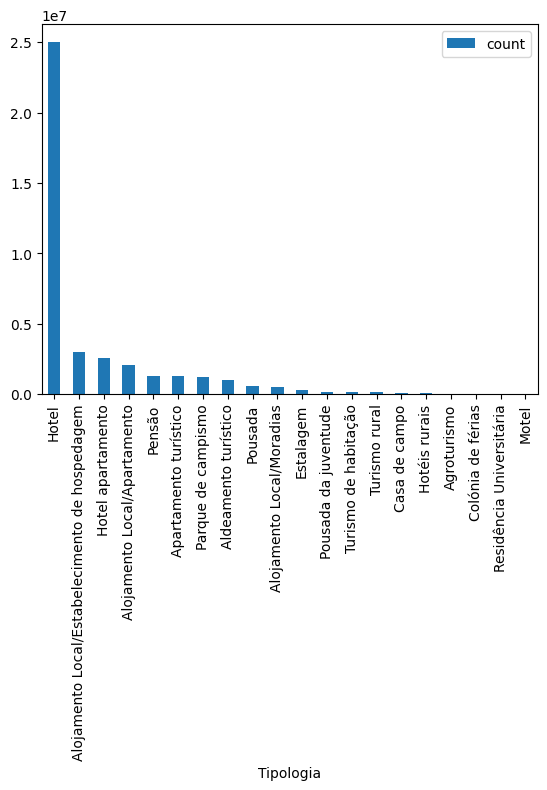

In [11]:
frame_typology = frame.groupBy("Tipologia").count().toPandas().sort_values(by=['count'],ascending=False).head(20)
frame_typology.plot(x="Tipologia", y="count", kind="bar")

<Axes: xlabel='Concelho_UH'>

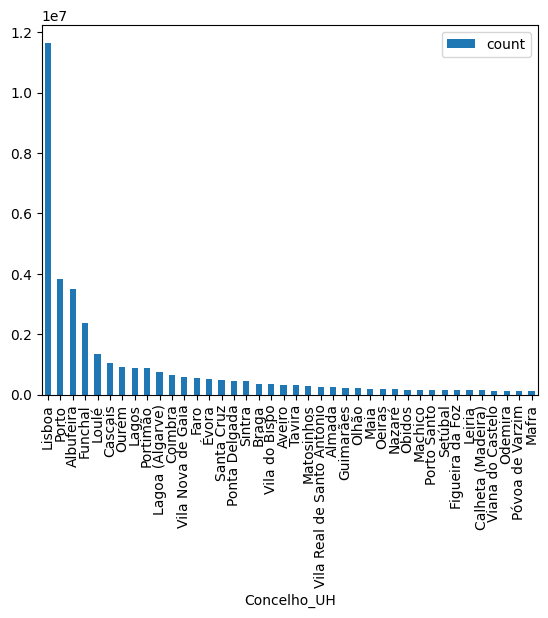

In [12]:
frame_concelho = frame.groupBy("Concelho_UH").count().toPandas().sort_values(by=['count'],ascending=False).head(40)
frame_concelho.plot(x="Concelho_UH", y="count", kind="bar")

In [13]:
alto_minho_list = ["Arcos de Valdevez","Caminha","Melgaço","Monção","Paredes de Coura","Ponte da Barca",
                   "Ponte de Lima","Valença","Viana do Castelo","Vila Nova de Cerveira"]

alto_tamega_list = ["Boticas","Chaves","Montalegre","Ribeira de Pena","Valpaços","Vila Pouca de Aguiar"]

tras_os_montes_list = ["Alfândega da Fé","Bragança","Macedo de Cavaleiros","Miranda do Douro","Mirandela",
                       "Mogadouro","Vila Flor","Vimioso","Vinhais"]

cavado_list = ["Amares","Barcelos","Braga","Esposende","Terras de Bouro","Vila Verde"]

ave_list = ["Cabeceiras de Basto","Fafe","Guimarães","Mondim de Basto","Póvoa de Lanhoso","Vieira do Minho",
            "Vila Nova de Famalicão","Vizela"]

porto_list = ["Arouca","Espinho","Gondomar","Maia","Matosinhos","Oliveira de Azeméis","Paredes","Porto","Póvoa de Varzim",
              "Santa Maria da Feira","Santo Tirso","São João da Madeira","Trofa","Vale de Cambra","Valongo","Vila do Conde","Vila Nova de Gaia"]

tamega_sousa_list = ["Amarante","Baião","Castelo de Paiva","Celorico de Basto","Cinfães","Felgueiras","Lousada",
                      "Marco de Canaveses","Paços de Ferreira","Penafiel","Resende"]

douro_list = ["Alijó","Armamar","Carrazeda de Ansiães","Freixo de Espada à Cinta","Lamego","Mesão Frio",
              "Moimenta da Beira","Murça","Penedono","Peso da Régua","Sabrosa","Santa Marta de Penaguião","São João da Pesqueira",
              "Sernancelhe","Tabuaço","Tarouca","Torre de Moncorvo","Vila Nova de Foz Côa","Vila Real"]

aveiro_list = ["Águeda","Albergaria-a-Velha","Anadia","Aveiro","Estarreja","Ílhavo","Murtosa","Oliveira do Bairro","Ovar","Sever do Vouga",
               "Vagos"]

viseu_list = ["Aguiar da Beira","Carregal do Sal","Castro Daire","Mangualde","Nelas","Oliveira de Frades","Penalva do Castelo",
              "Santa Comba Dão","São Pedro do Sul","Sátão","Tondela","Vila Nova de Paiva","Viseu","Vouzela"]

beiras_e_serra_da_estrela_list = ["Almeida","Belmonte","Celorico da Beira","Covilhã","Figueira de Castelo Rodrigo","Fornos de Algodres",
                                  "Fundão","Gouveia","Guarda","Manteigas","Mêda","Pinhel","Sabugal","Seia","Trancoso"]

coimbra_list = ["Arganil","Cantanhede","Coimbra","Condeixa-a-Nova","Figueira da Foz","Góis","Lousã","Mealhada","Mira",
                "Miranda do Corvo","Montemor-o-Velho","Mortágua","Oliveira do Hospital","Pampilhosa da Serra","Penacova","Penela",
               "Soure","Tábua","Vila Nova de Poiares"]

leiria_list = ["Alvaiázere","Ansião","Batalha","Castanheira de Pera","Figueiró dos Vinhos","Leiria","Marinha Grande",
               "Pedrógão Grande","Pombal","Porto de Mós"]

beira_baixa_list = ["Castelo Branco","Idanha-a-Nova","Oleiros","Penamacor","Proença-a-Nova","Vila Velha de Ródão"]

medio_tejo_list = ["Abrantes","Alcanena","Constância","Entroncamento","Ferreira do Zêzere","Mação","Ourém","Sardoal",
                   "Tomar","Torres Novas","Vila Nova da Barquinha","Sertã","Vila de Rei"]

oeste_list = ["Alcobaça","Alenquer","Arruda dos Vinhos","Bombarral","Cadaval","Caldas da Rainha","Lourinhã","Nazaré","Óbidos",
              "Peniche","Sobral de Monte Agraço","Torres Vedras"]

leziria_tejo_list = ["Almeirim","Alpiarça","Azambuja","Benavente","Cartaxo","Chamusca","Coruche","Golegã","Rio Maior","Salvaterra de Magos",
                     "Santarém"]

alto_alentejo_list = ["Alter do Chão","Arronches","Avis","Campo Maior","Castelo de Vide","Crato","Elvas","Fronteira","Gavião",
                      "Marvão","Monforte","Nisa","Ponte de Sor","Portalegre","Sousel"]

lisboa_list = ["Alcochete","Almada","Amadora","Barreiro","Cascais","Lisboa","Loures","Mafra","Moita","Montijo","Odivelas",
               "Oeiras","Palmela","Seixal","Sesimbra","Setúbal","Sintra","Vila Franca de Xira",]

alentejo_central_list = ["Alandroal","Arraiolos","Borba","Estremoz","Évora","Montemor-o-Novo","Mora","Mourão","Portel",
                         "Redondo","Reguengos de Monsaraz","Vendas Novas","Viana do Alentejo","Vila Viçosa"]

alentejo_litoral_list = ["Alcácer do Sal","Grândola","Odemira","Santiago do Cacém","Sines"]

baixo_alentejo_list = ["Aljustrel","Almodôvar","Alvito","Barrancos","Beja","Castro Verde","Cuba","Ferreira do Alentejo","Mértola",
                       "Moura","Ourique","Serpa","Vidigueira"]

algarve_list = ["Faro","Loulé","Albufeira","Portimão","Silves","Lagos","Lagoa (Algarve)","Tavira",
                "Olhão","Vila do Bispo","Aljezur","Vila Real de Santo António","Alcoutim","São Brás de Alportel",
                "Castro Marim","Monchique"]

açores_list = ["Corvo","Santa Cruz das Flores","Lajes das Flores","Horta","Santa Cruz da Graciosa","Velas","Calheta (São Jorge)","São Roque do Pico","Madalena",
               "Lajes do Pico","Praia da Vitória","Angra do Heroísmo","Ponta Delgada","Lagoa (São Miguel)","Ribeira Grande","Vila Franca do Campo", "Povoação","Nordeste","Vila do Porto"]

madeira_list = ["Calheta (Madeira)","Câmara de Lobos","Funchal","Machico","onta do Sol","Porto Moniz"]

In [14]:
nuts_III_dict = {}

alto_minho = frame.filter(frame.Concelho_UH.isin(alto_minho_list))
cavado = frame.filter(frame.Concelho_UH.isin(cavado_list))
ave = frame.filter(frame.Concelho_UH.isin(ave_list))
area_metropolitana_porto = frame.filter(frame.Concelho_UH.isin(porto_list))
alto_tamega = frame.filter(frame.Concelho_UH.isin(alto_tamega_list))
tamega_sousa = frame.filter(frame.Concelho_UH.isin(tamega_sousa_list))
douro = frame.filter(frame.Concelho_UH.isin(douro_list))
terras_tras_os_montes = frame.filter(frame.Concelho_UH.isin(tras_os_montes_list))
algarve = frame.filter(frame.Concelho_UH.isin(algarve_list))
oeste = frame.filter(frame.Concelho_UH.isin(oeste_list))
aveiro = frame.filter(frame.Concelho_UH.isin(aveiro_list))
coimbra = frame.filter(frame.Concelho_UH.isin(coimbra_list))
leiria = frame.filter(frame.Concelho_UH.isin(leiria_list))
viseu = frame.filter(frame.Concelho_UH.isin(viseu_list))
beira_baixa = frame.filter(frame.Concelho_UH.isin(beira_baixa_list))
medio_tejo = frame.filter(frame.Concelho_UH.isin(medio_tejo_list))
beiras_e_serra_da_estrela = frame.filter(frame.Concelho_UH.isin(beiras_e_serra_da_estrela_list))
area_metropolitana_lisboa = frame.filter(frame.Concelho_UH.isin(lisboa_list))
alentejo_litoral = frame.filter(frame.Concelho_UH.isin(alentejo_litoral_list))
baixo_alentejo = frame.filter(frame.Concelho_UH.isin(baixo_alentejo_list))
leziria_do_tejo = frame.filter(frame.Concelho_UH.isin(leziria_tejo_list))
alto_alentejo = frame.filter(frame.Concelho_UH.isin(alto_alentejo_list))
alentejo_central = frame.filter(frame.Concelho_UH.isin(alentejo_central_list))
acores = frame.filter(frame.Concelho_UH.isin(açores_list))
madeira = frame.filter(frame.Concelho_UH.isin(madeira_list))

nuts_III_dict["Alto minho"] = alto_minho.count()
nuts_III_dict["Cavado"] = cavado.count()
nuts_III_dict["Ave"] = ave.count()
nuts_III_dict["Área Metropolitana Porto"] = area_metropolitana_porto.count()
nuts_III_dict["Alto Tâmega"] = alto_tamega.count()
nuts_III_dict["Tâmega/Sousa"] = tamega_sousa.count()
nuts_III_dict["Douro"] = douro.count()
nuts_III_dict["Terras Trás os Montes"] = terras_tras_os_montes.count()
nuts_III_dict["Algarve"] = algarve.count()
nuts_III_dict["Oeste"] = oeste.count()
nuts_III_dict["Aveiro"] = aveiro.count()
nuts_III_dict["Coimbra"] = coimbra.count()
nuts_III_dict["Leiria"] = leiria.count()
nuts_III_dict["Viseu"] = viseu.count()
nuts_III_dict["Beira Baixa"] = beira_baixa.count()
nuts_III_dict["Médio Tejo"] = medio_tejo.count()
nuts_III_dict["Beiras e Serra da Estrela"] = beiras_e_serra_da_estrela.count()
nuts_III_dict["Área Metropolitana Lisboa"] = area_metropolitana_lisboa.count()
nuts_III_dict["Alentejo Litoral"] = alentejo_litoral.count()
nuts_III_dict["Baixo Alentejo"] = baixo_alentejo.count()
nuts_III_dict["Leziria do Tejo"] = leziria_do_tejo.count()
nuts_III_dict["Alto Alentejo"] = alto_alentejo.count()
nuts_III_dict["Alentejo Central"] = alentejo_central.count()
nuts_III_dict["Açores"] = acores.count()
nuts_III_dict["Madeira"] = madeira.count()

In [15]:
nuts_III_df = spark.createDataFrame([(key,value) for key,value in nuts_III_dict.items()], ['Region', 'Count'])

<Axes: xlabel='Region'>

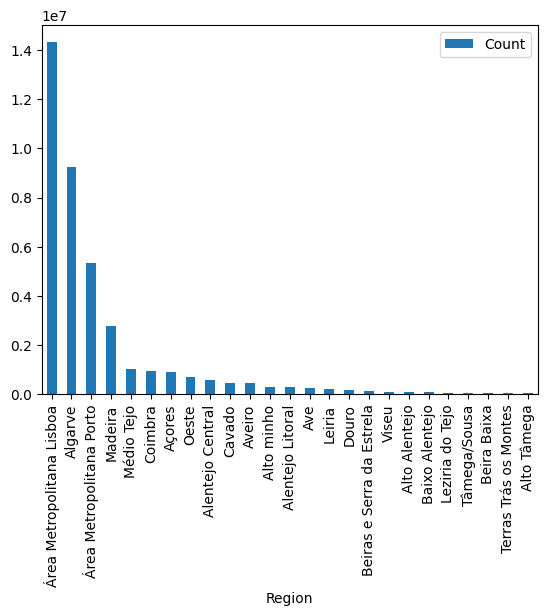

In [16]:
frame_nuts_III = nuts_III_df.toPandas().sort_values(by=['Count'],ascending=False)
frame_nuts_III.plot(x="Region", y="Count", kind="bar")

<Axes: xlabel='Nacionalidade'>

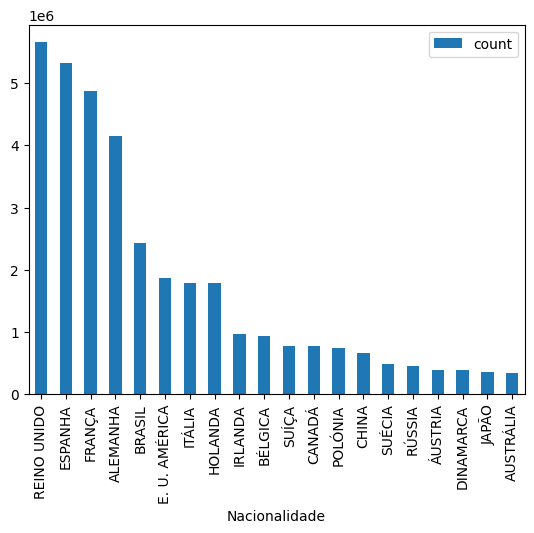

In [42]:
frame_nacionalidade = frame.groupBy("Nacionalidade").count().toPandas().sort_values(by=['count'],ascending=False).head(20)
frame_nacionalidade.plot(x="Nacionalidade", y="count", kind="bar")

<Axes: xlabel='Pais_Origem'>

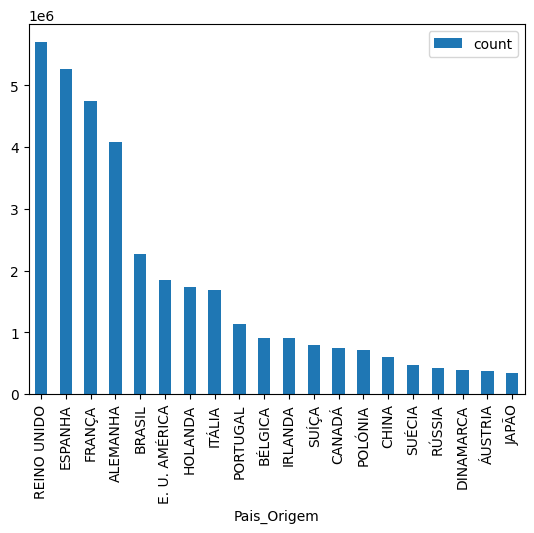

In [41]:
frame_pais_origem = frame.groupBy("Pais_Origem").count().toPandas().sort_values(by=['count'],ascending=False).head(20)
frame_pais_origem.plot(x="Pais_Origem", y="count", kind="bar")

### OneHotEncoder 

In [ ]:

"""
# Tipologia
indexer = StringIndexer(inputCol='Tipologia', outputCol='Tipologia_numeric')
indexer_fitted = indexer.fit(frame)
frame_indexed = indexer_fitted.transform(frame)

encoder = OneHotEncoder(inputCols=['Tipologia_numeric'], outputCols=['Tipologia_onehot'], dropLast=False)
frame_onehot_no_base = encoder.fit(frame_indexed).transform(frame_indexed)

df_col_onehot = frame_onehot_no_base.select('*', vector_to_array('Tipologia_onehot').alias('Tipologia_col_onehot'))

num_categories = len(df_col_onehot.first()['Tipologia_col_onehot'])  
cols_expanded = [(F.col('Tipologia_col_onehot')[i].alias(f'{indexer_fitted.labels[i]}')) for i in range(num_categories)]
df_cols_onehot = df_col_onehot.select("*", *cols_expanded)

cols = ("Tipologia","Tipologia_numeric","Tipologia_onehot","Tipologia_col_onehot")
frame = df_cols_onehot.drop(*cols)


# Concelho_UH
indexer = StringIndexer(inputCol='Concelho_UH', outputCol='Concelho_UH_numeric')
indexer_fitted = indexer.fit(frame)
frame_indexed = indexer_fitted.transform(frame)

encoder = OneHotEncoder(inputCols=['Concelho_UH_numeric'], outputCols=['Concelho_UH_onehot'], dropLast=False)
frame_onehot_no_base = encoder.fit(frame_indexed).transform(frame_indexed)

df_col_onehot = frame_onehot_no_base.select('*', vector_to_array('Concelho_UH_onehot').alias('Concelho_UH_col_onehot'))

num_categories = len(df_col_onehot.first()['Concelho_UH_col_onehot'])  
cols_expanded = [(F.col('Concelho_UH_col_onehot')[i].alias(f'{indexer_fitted.labels[i]}')) for i in range(num_categories)]
df_cols_onehot = df_col_onehot.select("*", *cols_expanded)

cols = ("Concelho_UH","Concelho_UH_numeric","Concelho_UH_onehot","Concelho_UH_col_onehot")
frame = df_cols_onehot.drop(*cols)

# Nacionalidade
indexer = StringIndexer(inputCol='Nacionalidade', outputCol='Nacionalidade_numeric')
indexer_fitted = indexer.fit(frame)
frame_indexed = indexer_fitted.transform(frame)

encoder = OneHotEncoder(inputCols=['Nacionalidade_numeric'], outputCols=['Nacionalidade_onehot'], dropLast=False)
frame_onehot_no_base = encoder.fit(frame_indexed).transform(frame_indexed)

df_col_onehot = frame_onehot_no_base.select('*', vector_to_array('Nacionalidade_onehot').alias('Nacionalidade_col_onehot'))

num_categories = len(df_col_onehot.first()['Nacionalidade_col_onehot'])  
cols_expanded = [(F.col('Nacionalidade_col_onehot')[i].alias(f'Nacionalidade_{indexer_fitted.labels[i]}')) for i in range(num_categories)]
df_cols_onehot = df_col_onehot.select("*", *cols_expanded)

cols = ("Nacionalidade","Nacionalidade_numeric","Nacionalidade_onehot","Nacionalidade_col_onehot")
frame = df_cols_onehot.drop(*cols)

# Pais_Origem
indexer = StringIndexer(inputCol='Pais_Origem', outputCol='Pais_Origem_numeric')
indexer_fitted = indexer.fit(frame)
frame_indexed = indexer_fitted.transform(frame)

encoder = OneHotEncoder(inputCols=['Pais_Origem_numeric'], outputCols=['Pais_Origem_onehot'], dropLast=False)
frame_onehot_no_base = encoder.fit(frame_indexed).transform(frame_indexed)

df_col_onehot = frame_onehot_no_base.select('*', vector_to_array('Pais_Origem_onehot').alias('Pais_Origem_col_onehot'))

num_categories = len(df_col_onehot.first()['Pais_Origem_col_onehot'])  
cols_expanded = [(F.col('Pais_Origem_col_onehot')[i].alias(f'Pais_Origem_{indexer_fitted.labels[i]}')) for i in range(num_categories)]
df_cols_onehot = df_col_onehot.select("*", *cols_expanded)

cols = ("Pais_Origem","Pais_Origem_numeric","Pais_Origem_onehot","Pais_Origem_col_onehot")
frame = df_cols_onehot.drop(*cols)

from sequence import Sequence
new_col_names_list = []

for col in frame.columns:  
    new_col_names_list.append(col.replace(" ", "_"))
    
frame = frame.toDF(*new_col_names_list)

new_col_names_list = []

for col in frame.columns:  
    new_col_names_list.append(col.replace(".", ""))
    
frame = frame.toDF(*new_col_names_list)
"""

In [ ]:
# frame.count()

In [ ]:
# frame.describe().show()